In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from numpy import exp, loadtxt, pi, sqrt
import itertools as iter
import scipy.optimize as opt
import numpy as np
import itertools as iter

import warnings
warnings.filterwarnings('ignore')

In [34]:

def read_csv_file(name):
    df = pd.read_csv(name,encoding='ISO-8859-1')
    df.drop(columns=['Country Code', 'Series Code'], axis=1, inplace=True)
    years = df.head(0).drop(
        ['Country Name', 'Series Name'], axis=1)
    df.rename(columns={'Country Name':'country','Series Name':'indicator'},inplace=True)
    for cl in df.columns:
        if 'YR' in cl:
            df.rename(columns={cl:cl.split('[YR')[0].strip()},inplace=True)
    return years.T, df

In [113]:
year,df=read_csv_file('30a52670-f442-4aa9-9400-1a0fe09f1da1_Series - Metadata.csv')

In [114]:
df=df[df.indicator.isin(['Forest area (sq. km)','CO2 emissions (metric tons per capita)'])]
df['indicator']=df['indicator'].str.replace('Forest area (sq. km)','forest_area')
df['indicator']=df['indicator'].str.replace('CO2 emissions (metric tons per capita)','co2')

In [115]:
df_new=df[['country','indicator','2020']]
df_forest=df_new[df_new.indicator=='forest_area']
df_forest.rename(columns={'2020':'forest_area'},inplace=True)
df_forest.drop(columns=['indicator'],inplace=True)
df_co2=df_new[df_new.indicator=='co2']
df_co2.rename(columns={'2020':'co2'},inplace=True)
df_co2.drop(columns=['indicator'],inplace=True)

In [116]:
df_final=pd.merge(df_co2,df_forest,on=['country'])
df_final = df_final.replace('..', pd.NA)
df_final=df_final.dropna()
df_final=df_final[~df_final.country.isin(['World'])]

country
Qatar                  38.89555
United Arab Emirates   24.58608
Kuwait                 24.34346
Bahrain                22.19859
Luxembourg             20.66822
United States          17.90220
North America          17.70091
Australia              17.02309
Brunei Darussalam      16.33395
Canada                 15.89564
dtype: object


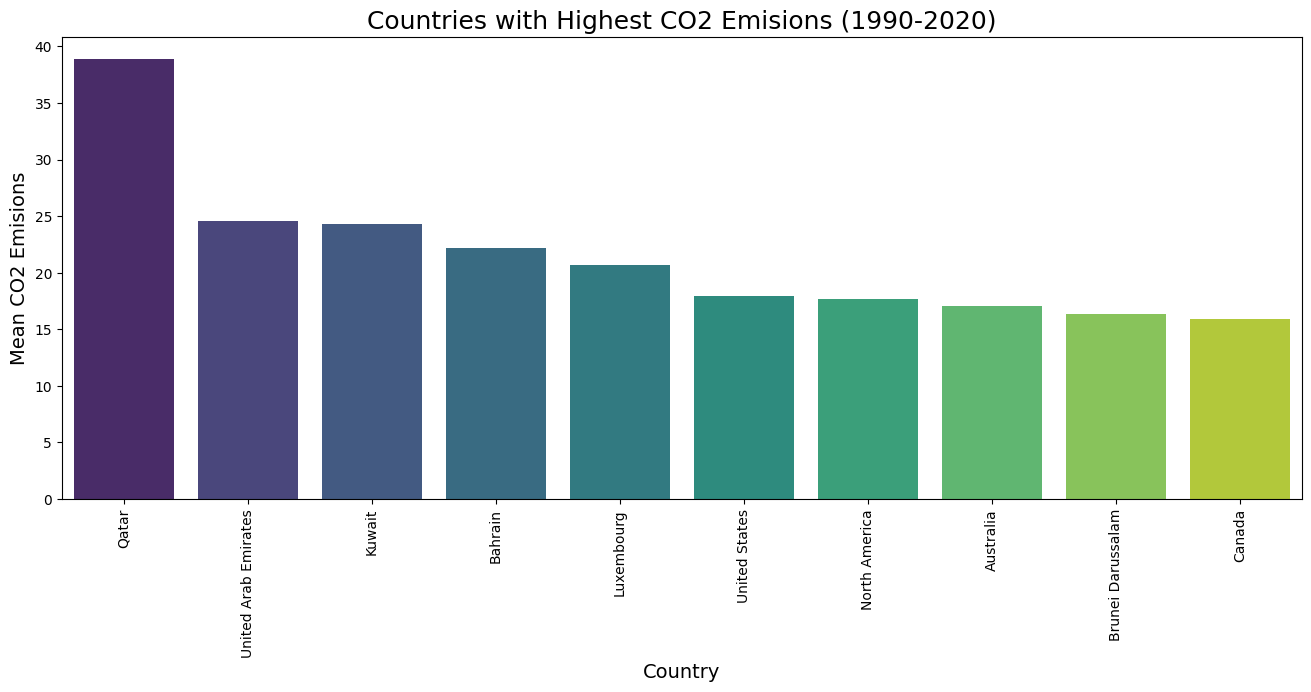

country
IDA & IBRD total            31314432.92552
Low & middle income         30332418.46207
Middle income               27079709.16552
IBRD only                   24388027.65276
Upper middle income         20950540.53034
Late-demographic dividend   17582684.11724
OECD members                11548215.17483
Europe & Central Asia       10436429.72000
High income                 10389498.80759
Post-demographic dividend    9960542.65514
dtype: object


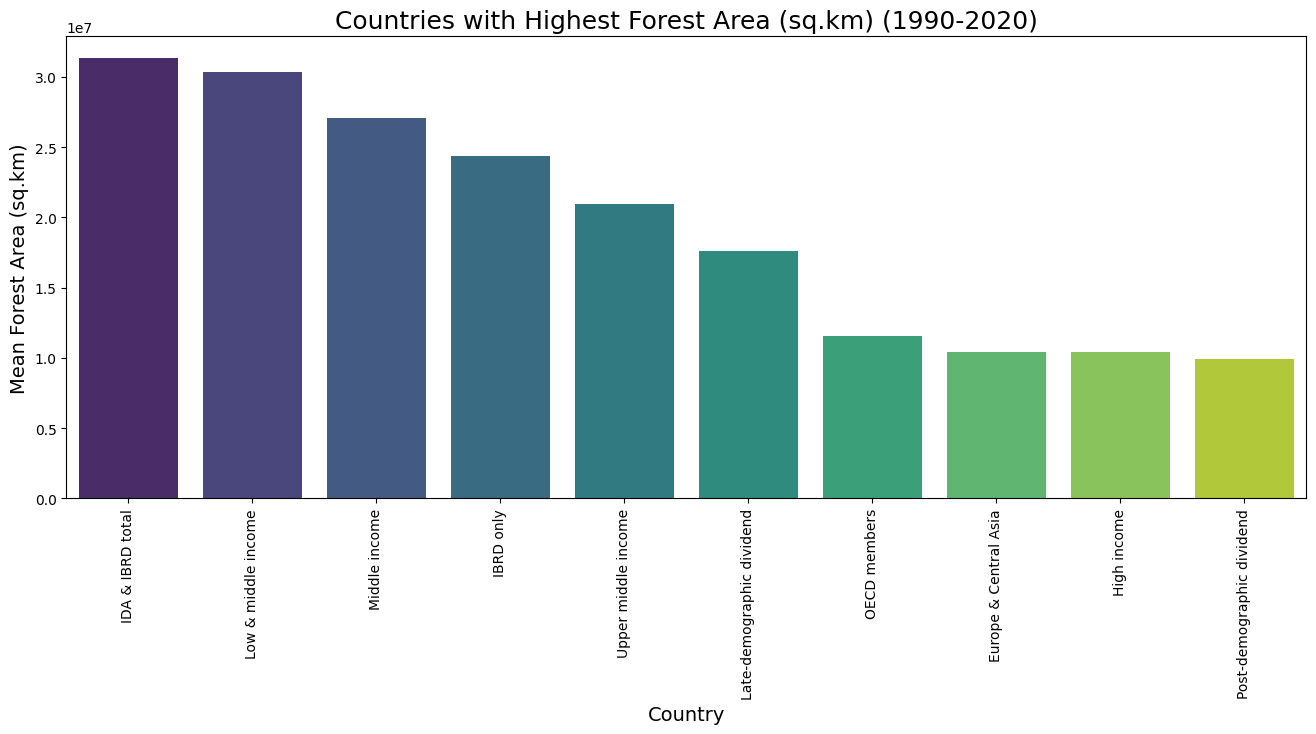

In [119]:
def top_ten_countries(df,indicator,name):
    data = df[df['indicator'] == indicator]
    data=data[~data.country.isin(['World'])]
    data.set_index('country', inplace=True)
    # Convert numerical columns to numeric, coerce errors to NaN
    data.iloc[:, 2:-2] = data.iloc[:, 2:-2].apply(pd.to_numeric, errors='coerce')
    # Calculate the mean CO2 emissions for each country
    mean_data_by_country = data.iloc[:, 2:-2].mean(axis=1)
    # Sort countries by mean CO2 emissions in descending order
    top_countries = mean_data_by_country.sort_values(ascending=False)
    top_countries = top_countries[top_countries > 0].head(10)
    print(top_countries)
    # Plotting the results
    plt.figure(figsize=(16, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values,palette='viridis')
    plt.title(f"Countries with Highest {name} (1990-2020)", fontsize=18)
    plt.xlabel("Country", fontsize=14)
    plt.ylabel(f"Mean {name}", fontsize=14)
    plt.xticks(rotation=90)
    plt.show()
top_ten_countries(df,'co2','CO2 Emisions')
top_ten_countries(df,'forest_area','Forest Area (sq.km)')

# Visualize the normalized data

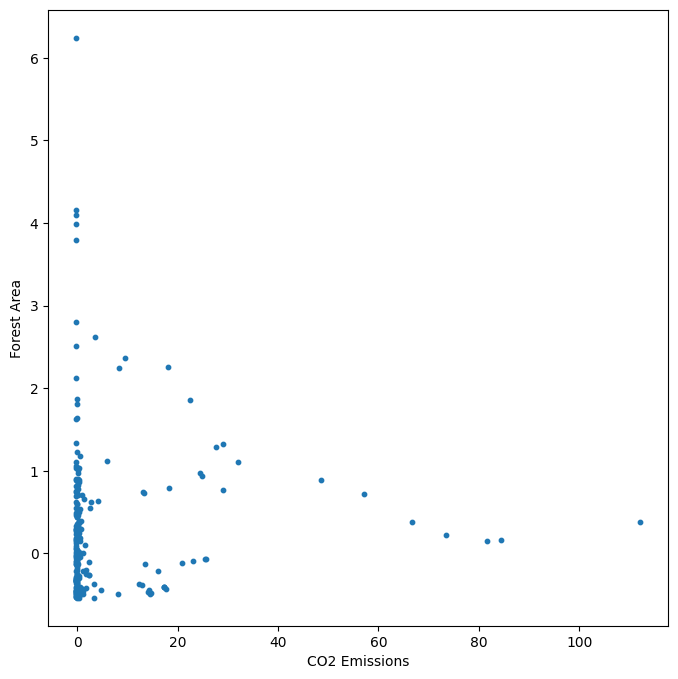

In [11]:
num_clusters = 3
scaler = pp.RobustScaler()
df_clust = df_final[["forest_area", "co2"]]
scaler.fit(df_clust)
norm = scaler.transform(df_clust)
plt.figure(figsize=(8.0, 8.0))
plt.scatter(norm[:,0], norm[:, 1], 10, marker="o")
plt.xlabel("CO2 Emissions")
plt.ylabel("Forest Area")
plt.show()

# KMeans Clustering

df_temp

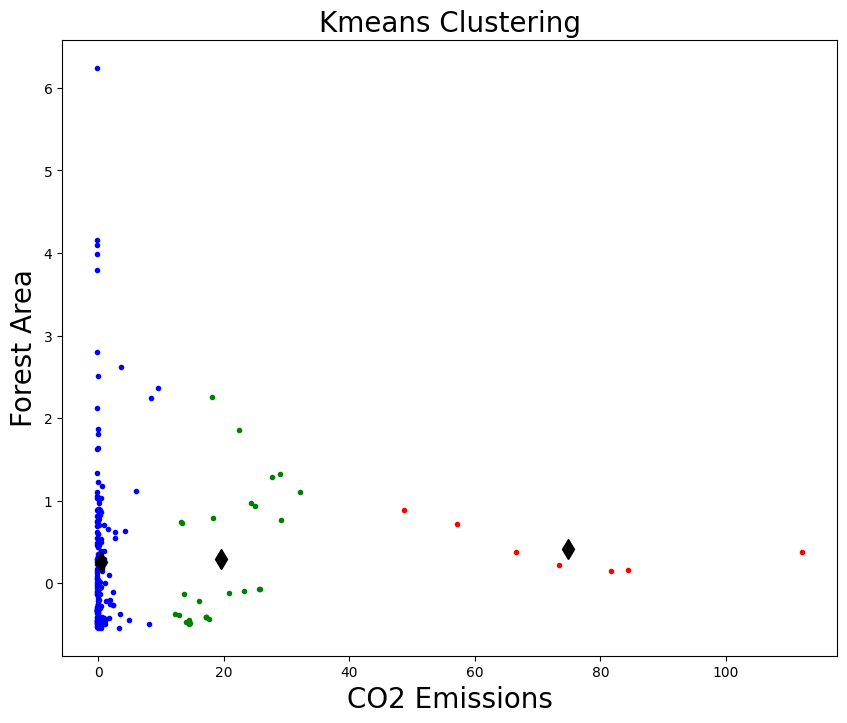

<Figure size 640x480 with 0 Axes>

In [122]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(norm)

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_
# print(df_fit.head())
df_fit=norm.copy()
plt.figure(figsize=(10, 8))
col = ["blue", "red", "green"]
for l in range(3): # loop over the different labels 
    plt.plot(df_fit[:,0][labels==l], df_fit[:,1][labels==l], "o",
             markersize=3, color=col[l])

# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Kmeans Clustering", fontsize = 20)
plt.xlabel("CO2 Emissions", fontsize = 20)
plt.ylabel("Forest Area", fontsize = 20)
plt.show()

# Curve Fitting

In [124]:
_,df=read_csv_file('30a52670-f442-4aa9-9400-1a0fe09f1da1_Series - Metadata.csv')

In [125]:
df=df[df.country=='World']
df.drop(columns=['country'],axis=1,errors='ignore',inplace=True)

In [126]:
df=df[df.indicator=='Forest area (sq. km)']


In [128]:
df_melted = pd.melt(df, id_vars=['indicator'], var_name='year', value_name='value')
df_melted['year'] = df_melted['year'].astype(str).str.extract('(\d+)').astype(int)
df_melted.sort_values(by='year',inplace=True)
df_melted.drop(columns=['indicator'],axis=1,errors='ignore',inplace=True)
df_melted=df_melted.replace('..',pd.NA)
df_melted=df_melted[~df_melted.value.isna()]
df_melted.rename(columns={'value':'forest_area'},inplace=True)
df_melted

,year,forest_area
1,1992,42034236.56
2,1993,42001089.88
3,1994,41922610.6
4,1995,41844131.32
5,1996,41765652.05
6,1997,41687172.76
7,1998,41608693.48
8,1999,41530214.2
9,2000,41459274.92
10,2001,41407133.15


In [129]:
def exponential_growth(x, a, b):
    return a * np.exp(b * x)    

In [130]:
pd.options.display.float_format = '{:.5f}'.format

In [131]:
params, cov = opt.curve_fit(exponential_growth, df_melted["year"], df_melted["forest_area"], p0=[1e6,0.02], maxfev =2000)
df_melted['exp']=exponential_growth(df_melted['year'],*params)
print("Fit parameter", params)
cov


Fit parameter [ 5.47907289e+08 -1.28991346e-03]


array([[ 6.83207315e+14, -6.21498372e+02],
       [-6.21498372e+02,  5.65373650e-10]])

In [132]:
df_melted['exp']=df_melted['exp'].astype(float)
df_melted['forest_area']=df_melted['forest_area'].astype(float)

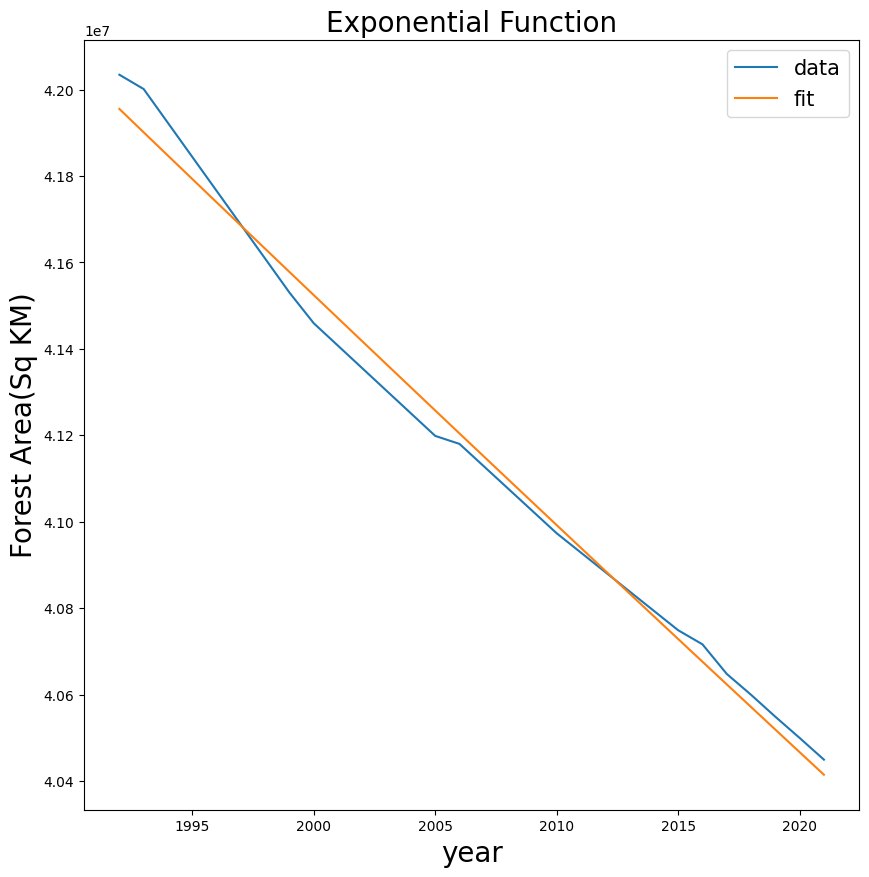

In [133]:
plt.figure(figsize=(10,10))
plt.plot(df_melted["year"], df_melted["forest_area"], label="data")
plt.plot(df_melted["year"], df_melted["exp"], label="fit")

plt.legend(fontsize = 15)
plt.xlabel("year", fontsize = 20)
plt.ylabel("Forest Area(Sq KM)", fontsize = 20)
plt.title("Exponential Function", fontsize = 20)
plt.show()

# Error Ranges

In [134]:
def err_ranges(x, func, param, sigma):
    
    lower = func(x, *param)
    upper = lower
    upper_lower = []  
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        upper_lower.append((pmin, pmax))
        
    pmix = list(iter.product(*upper_lower))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 


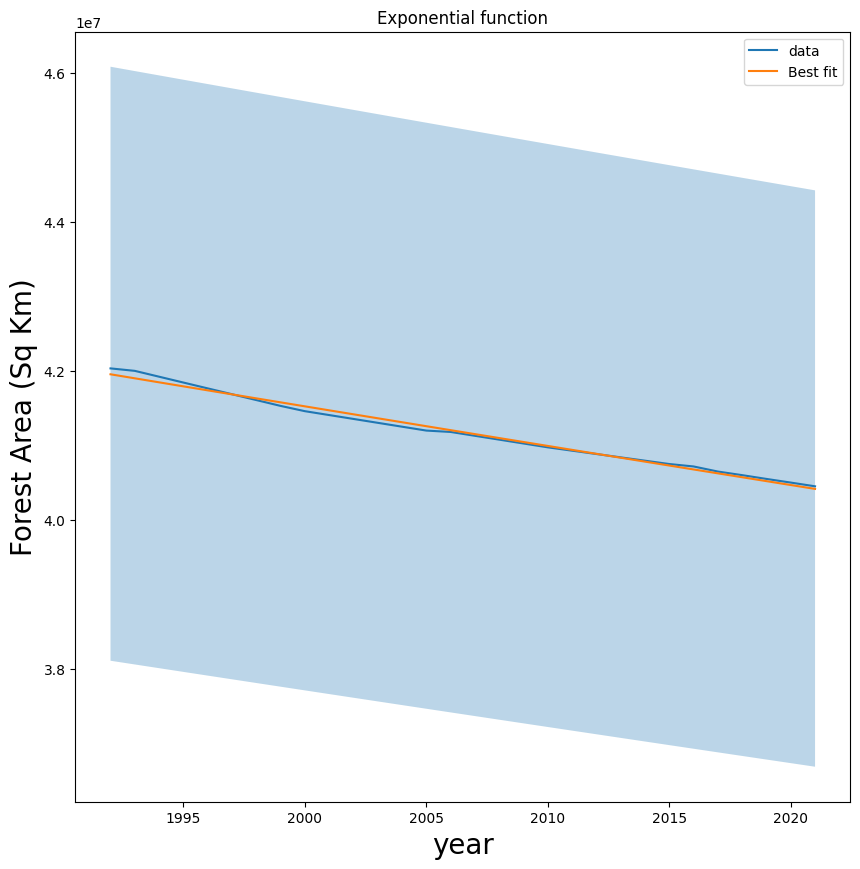

In [135]:
sigma = np.sqrt(np.diag(cov))
low, up = err_ranges(df_melted["year"], exponential_growth, params, sigma)
plt.figure(figsize=(10,10))
plt.title("Exponential function")
plt.plot(df_melted["year"], df_melted["forest_area"], label="data")
plt.plot(df_melted["year"], df_melted["exp"], label="Best fit")

plt.fill_between(df_melted["year"], low, up, alpha=0.3)
plt.legend()
plt.xlabel("year", fontsize = 20)
plt.ylabel("Forest Area (Sq Km)", fontsize = 20)
plt.show()

In [140]:
print("Predicted Forest Area")
for year in [2030, 2040]:
    low, up = err_ranges(year, exponential_growth, params, sigma)
    print(year," between ", low, "and", up)

Predicted Forest Area
2030  between  36249741.11409789 and 43923649.18756397
2040  between  35776645.8195472 and 43371021.9966853
